In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import  f1_score, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# import classification models
from sklearn.svm import SVC                         # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import pickle

import warnings
warnings.filterwarnings("ignore")

#display all columns for better visibility
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset while dropping 'created_time'
data = pd.read_csv("data/cleaned_data.csv")
print("Data imported successfully")

Data imported successfully


In [3]:
# create a copy of the original dataset
df = data.copy()

In [4]:
# inspect dataframe by printing out the first 5 rows
df.head()

,created_time,Age,Gender,average_household_income,parents_educational_qualification,marital_status_of_parents,Residence,Type_of_family,no_of_siblings,parental_support,average_days_absent,distance_btwn_home_school,use_of_library_and_study_spaces,use_of_internet,jamb_score,class_participation,stress_levels,daily_study,extracurricular_activities,study_satasifaction,last_academic_performance,exam_prep_challenges,recommendations
0,10/3/2024 14:05:08,16 -20,Female,low-middleclass,Post Graduate,Married,Urban,Nuclear,2,5,1,less than 1km,5,NaN,195,High,4,5,3,4,4,"lack of study materials, Financial Difficulties",Parental Support
1,10/3/2024 14:12:50,25-30,Male,upper-middleclass,National Diploma,Single,Rural,Nuclear,4,5,5,1-3km,3,2.0,180,Moderate,4,4,3,4,4,"lack of study materials, limited access to qui...","More access to study materials, Private tutori..."
2,10/3/2024 14:19:07,21-25,Male,low,HND,Married,Urban,Nuclear,4,5,0,1-3km,3,2.0,171,High,4,4,4,4,4,Poor Understanding of Courses/Subjects,"More access to study materials, Private tutorials"
3,10/3/2024 14:22:02,25-30,Male,low-middleclass,HND,Single,Rural,Nuclear,6,4,1,1-3km,2,3.0,208,High,4,1,1,4,4,"limited access to quiet place of study, lack o...","More access to study materials, Private tutorials"
4,10/3/2024 14:35:54,16 -20,Male,low,National Diploma,Married,Urban,Nuclear,3,4,0,3-5km,2,2.0,187,Moderate,3,3,4,4,4,Poor Understanding of Courses/Subjects,Private tutorials


In [5]:
# check the shape of the dataset i.e. the number of rows and columns
df.shape

(59, 23)

In [6]:
# check for low- and high-cardinality features
df.nunique()

created_time                         59
Age                                   6
Gender                                2
average_household_income              4
parents_educational_qualification     6
marital_status_of_parents             4
Residence                             3
Type_of_family                        2
no_of_siblings                       10
parental_support                      4
average_days_absent                  10
distance_btwn_home_school             4
use_of_library_and_study_spaces       5
use_of_internet                       5
jamb_score                           35
class_participation                   3
stress_levels                         5
daily_study                           5
extracurricular_activities            5
study_satasifaction                   5
last_academic_performance             4
exam_prep_challenges                 15
recommendations                      11
dtype: int64

In [7]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   created_time                       59 non-null     object 
 1   Age                                59 non-null     object 
 2   Gender                             59 non-null     object 
 3   average_household_income           59 non-null     object 
 4   parents_educational_qualification  59 non-null     object 
 5   marital_status_of_parents          59 non-null     object 
 6   Residence                          59 non-null     object 
 7   Type_of_family                     59 non-null     object 
 8   no_of_siblings                     59 non-null     int64  
 9   parental_support                   59 non-null     int64  
 10  average_days_absent                59 non-null     int64  
 11  distance_btwn_home_school          59 non-null     object 
 

In [8]:
# Check the datatype counts of the dataset
df.dtypes.value_counts()

object     12
int64      10
float64     1
dtype: int64

In [9]:
# check for duplicated record
df.duplicated().any()

False

In [10]:
# check for missingness in the features
df.isnull().sum()

created_time                         0
Age                                  0
Gender                               0
average_household_income             0
parents_educational_qualification    0
marital_status_of_parents            0
Residence                            0
Type_of_family                       0
no_of_siblings                       0
parental_support                     0
average_days_absent                  0
distance_btwn_home_school            0
use_of_library_and_study_spaces      0
use_of_internet                      1
jamb_score                           0
class_participation                  0
stress_levels                        0
daily_study                          0
extracurricular_activities           0
study_satasifaction                  0
last_academic_performance            0
exam_prep_challenges                 0
recommendations                      0
dtype: int64

In [11]:
# statistical description
df.describe()

,no_of_siblings,parental_support,average_days_absent,use_of_library_and_study_spaces,use_of_internet,jamb_score,stress_levels,daily_study,extracurricular_activities,study_satasifaction,last_academic_performance
count,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,4.559322,4.220339,2.711864,3.101695,3.775862,211.322034,3.813559,3.288136,3.338983,3.949153,4.135593
std,1.812516,1.204414,5.372506,1.295814,1.243130,37.121163,1.025109,1.083590,1.010465,0.936312,0.797791
min,1.000000,1.000000,0.000000,1.000000,1.000000,120.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,4.000000,0.000000,2.000000,3.000000,195.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,5.000000,2.000000,3.000000,4.000000,205.000000,4.000000,3.000000,3.000000,4.000000,4.000000
75%,5.500000,5.000000,3.000000,4.000000,5.000000,214.000000,5.000000,4.000000,4.000000,5.000000,5.000000
max,10.000000,5.000000,40.000000,5.000000,5.000000,345.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### Data transformation

In [12]:
# Create a new column 'jamb_performance' based on the 'jamb_score'
df['jamb_performance'] = df['jamb_score'].apply(lambda x: 'fail' if x < 200 else 'pass') # 50% is JAMB pass mark

In [13]:
# Define the bins and labels for categorizing the number of siblings
# - 0 to 3 siblings is categorized as 'Low'
# - More than 3 up to 6 siblings is categorized as 'Medium'
# - More than 6 siblings is categorized as 'High' (using float('inf') for unlimited upper bound)
bins = [0, 3, 6, float('inf')]  
labels = ['Low', 'Medium', 'High']  # Labels for the categories

# Bin the 'no_of_siblings' column
df['siblings_category'] = pd.cut(df['no_of_siblings'], bins=bins, labels=labels, right=True)

In [14]:
# Define the bins and labels for categorizing the number of days absent from school
# - -1 to 3 days is categorized as 'Low'
# - More than 3 up to 6 days is categorized as 'Medium'
# - More than 6 days is categorized as 'High' (using float('inf') for unlimited upper bound)
bins = [-1, 3, 6, float('inf')]  # The upper limit of the last bin is set to infinity
labels = ['Low', 'Moderate', 'High']

# Bin the 'average_days_absent' column
df['absence_category'] = pd.cut(df['average_days_absent'], bins=bins, labels=labels)

In [15]:
# Drop the following non-required columns from the DataFrame
df = df.drop(columns=['jamb_score', 'no_of_siblings', 'average_days_absent', 'created_time', 'exam_prep_challenges', 'recommendations'])

In [16]:
# check for low- and high-cardinality features
df.nunique()

Age                                  6
Gender                               2
average_household_income             4
parents_educational_qualification    6
marital_status_of_parents            4
Residence                            3
Type_of_family                       2
parental_support                     4
distance_btwn_home_school            4
use_of_library_and_study_spaces      5
use_of_internet                      5
class_participation                  3
stress_levels                        5
daily_study                          5
extracurricular_activities           5
study_satasifaction                  5
last_academic_performance            4
jamb_performance                     2
siblings_category                    3
absence_category                     3
dtype: int64

In [17]:
df.head()

,Age,Gender,average_household_income,parents_educational_qualification,marital_status_of_parents,Residence,Type_of_family,parental_support,distance_btwn_home_school,use_of_library_and_study_spaces,use_of_internet,class_participation,stress_levels,daily_study,extracurricular_activities,study_satasifaction,last_academic_performance,jamb_performance,siblings_category,absence_category
0,16 -20,Female,low-middleclass,Post Graduate,Married,Urban,Nuclear,5,less than 1km,5,NaN,High,4,5,3,4,4,fail,Low,Low
1,25-30,Male,upper-middleclass,National Diploma,Single,Rural,Nuclear,5,1-3km,3,2.0,Moderate,4,4,3,4,4,fail,Medium,Moderate
2,21-25,Male,low,HND,Married,Urban,Nuclear,5,1-3km,3,2.0,High,4,4,4,4,4,fail,Medium,Low
3,25-30,Male,low-middleclass,HND,Single,Rural,Nuclear,4,1-3km,2,3.0,High,4,1,1,4,4,pass,Medium,Low
4,16 -20,Male,low,National Diploma,Married,Urban,Nuclear,4,3-5km,2,2.0,Moderate,3,3,4,4,4,fail,Low,Low


In [18]:
# find categorical variable and encode
cat_features = df.select_dtypes(include=['object', 'category']).columns
num_features = [col for col in df.columns if col not in cat_features]

# print categorical variable
print("Categorical features: ", cat_features)

# print numerical variable
print("Numerical features: ", num_features)

Categorical features:  Index(['Age', 'Gender', 'average_household_income',
       'parents_educational_qualification', 'marital_status_of_parents',
       'Residence', 'Type_of_family', 'distance_btwn_home_school',
       'class_participation', 'jamb_performance', 'siblings_category',
       'absence_category'],
      dtype='object')
Numerical features:  ['parental_support', 'use_of_library_and_study_spaces', 'use_of_internet', 'stress_levels', 'daily_study', 'extracurricular_activities', 'study_satasifaction', 'last_academic_performance']


In [19]:
# Display unique values for each categorical column
for col in cat_features:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'Age': ['16 -20' '25-30' '21-25' '35 - 40' 'above 40' '30-34']
Unique values in 'Gender': ['Female' 'Male']
Unique values in 'average_household_income': ['low-middleclass' 'upper-middleclass' 'low' 'High']
Unique values in 'parents_educational_qualification': ['Post Graduate' 'National Diploma' 'HND' 'Secondary School Cert'
 'Informal' 'Bachelors Degree']
Unique values in 'marital_status_of_parents': ['Married' 'Single' 'Widowed' 'Divorced']
Unique values in 'Residence': ['Urban' 'Rural' 'Sub-Urban']
Unique values in 'Type_of_family': ['Nuclear' 'Extended']
Unique values in 'distance_btwn_home_school': ['less than 1km' '1-3km' '3-5km' 'Above 5km']
Unique values in 'class_participation': ['High' 'Moderate' 'Low']
Unique values in 'jamb_performance': ['fail' 'pass']
Unique values in 'siblings_category': ['Low', 'Medium', 'High']
Categories (3, object): ['Low' < 'Medium' < 'High']
Unique values in 'absence_category': ['Low', 'Moderate', 'High']
Categories (3, object): ['L

In [20]:
# mapping for each categorical feature
age_mapping = {
    '16 -20': 0, 
    '21-25': 1, 
    '25-30': 2, 
    '30-34': 3, 
    '35 - 40': 4, 
    'above 40': 5
}

gender_mapping = {
    'Female': 0, 
    'Male': 1
}

income_mapping = {
    'low': 0, 
    'low-middleclass': 1, 
    'upper-middleclass': 2, 
    'High': 3
}

education_mapping = {
    'Informal': 0, 
    'Secondary School Cert': 1, 
    'National Diploma': 2, 
    'HND': 3, 
    'Bachelors Degree': 4, 
    'Post Graduate': 5
}

marital_mapping = {
    'Single': 0, 
    'Married': 1, 
    'Divorced': 2, 
    'Widowed': 3
}

residence_mapping = {
    'Rural': 0, 
    'Sub-Urban': 1, 
    'Urban': 2
}

family_mapping = {
    'Nuclear': 0, 
    'Extended': 1
}

distance_mapping = {
    'less than 1km': 0, 
    '1-3km': 1, 
    '3-5km': 2, 
    'Above 5km': 3
}

participation_mapping = {
    'Low': 0, 
    'Moderate': 1, 
    'High': 2
}

jamb_mapping = {
    'fail': 0, 
    'pass': 1
}

siblings_mapping = {
    'Low': 0, 
    'Medium': 1, 
    'High': 2
}

absence_mapping = {
    'Low': 0, 
    'Moderate': 1, 
    'High': 2
}

# Apply mappings
df['Age'] = df['Age'].replace(age_mapping)
df['Gender'] = df['Gender'].replace(gender_mapping)
df['average_household_income'] = df['average_household_income'].replace(income_mapping)
df['parents_educational_qualification'] = df['parents_educational_qualification'].replace(education_mapping)
df['marital_status_of_parents'] = df['marital_status_of_parents'].replace(marital_mapping)
df['Residence'] = df['Residence'].replace(residence_mapping)
df['Type_of_family'] = df['Type_of_family'].replace(family_mapping)
df['distance_btwn_home_school'] = df['distance_btwn_home_school'].replace(distance_mapping)
df['class_participation'] = df['class_participation'].replace(participation_mapping)
df['jamb_performance'] = df['jamb_performance'].replace(jamb_mapping)
df['siblings_category'] = df['siblings_category'].replace(siblings_mapping)
df['absence_category'] = df['absence_category'].replace(absence_mapping)

# Check the modified DataFrame
df[cat_features].head()  # Display the first few rows to confirm changes

,Age,Gender,average_household_income,parents_educational_qualification,marital_status_of_parents,Residence,Type_of_family,distance_btwn_home_school,class_participation,jamb_performance,siblings_category,absence_category
0,0,0,1,5,1,2,0,0,2,0,0,0
1,2,1,2,2,0,0,0,1,1,0,1,1
2,1,1,0,3,1,2,0,1,2,0,1,0
3,2,1,1,3,0,0,0,1,2,1,1,0
4,0,1,0,2,1,2,0,2,1,0,0,0


In [21]:
# Fill missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

## Modelling

In [22]:
# create explanatory variable (X) and response variable (y)
X = df.drop('jamb_performance', axis=1)
y = df['jamb_performance']

In [23]:
# Split data into train and test sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print shapes of train and test sets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (41, 19), y_train shape: (41,)
X_test shape: (18, 19), y_test shape: (18,)


In [24]:
# Scale numeric features excluding 'jamb_performance'
sc = StandardScaler()
numeric = X_train.columns.difference(['jamb_performance'])
X_train[numeric], X_test[numeric] = sc.fit_transform(X_train[numeric]), sc.transform(X_test[numeric])

In [25]:
#  assert data split to avoid leakage
print(len(X_train) + len(X_test) == len(X))
print(len(y_train) + len(y_test) == len(y))

True
True


In [26]:
# instantiate models
modelclasses = {'LogisticReg': LogisticRegression(), 
                'SVC': SVC(),
                'DecisionTree': DecisionTreeClassifier(), 
                'RandomForest': RandomForestClassifier()
                }

In [27]:
# Iteration of models

# create a list to store model results
acc_scores = []
f1_scores = []

for model_name, model_method in modelclasses.items():
    
    
       
    # fit model to training data
    model_method.fit(X_train, y_train)
    
    # predict the outcomes on the test set
    y_pred = model_method.predict(X_test)
    
    # append accuracy evaluation metric for the model to the list 
    acc_scores.append(accuracy_score(y_test, y_pred))
    
    # append R2 score evaluation metric for the model to the list
    f1_scores.append(f1_score(y_test, y_pred))
    
# create a dataframe to store the results
cla_results = pd.DataFrame({"Model":modelclasses.keys(), "Accuracy Score": acc_scores, "F1 Score": f1_scores})
cla_results

,Model,Accuracy Score,F1 Score
0,LogisticReg,0.500000,0.571429
1,SVC,0.555556,0.666667
2,DecisionTree,0.333333,0.400000
3,RandomForest,0.500000,0.571429


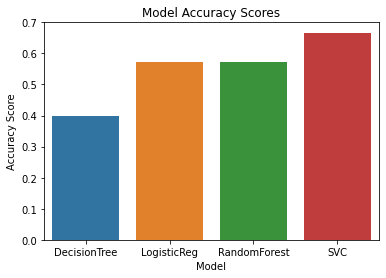

In [28]:
# Build bar chart, label axes, add title and show plot
sns.barplot(x='Model', y='F1 Score', data=cla_results, order=cla_results.sort_values('F1 Score').Model)
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Scores")
plt.show()

### Feature selection

In [29]:
# Feature selection using  Recursive Feature Elimination
from sklearn.feature_selection import RFE

# Initialize the Random Forest Classifier model as it is an ensemble model
model = RandomForestClassifier(random_state=42)

# Initialize RFE to select top 10 features which is about 50% of the features
rfe = RFE(estimator=model, n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Gender', 'average_household_income',
       'parents_educational_qualification', 'distance_btwn_home_school',
       'use_of_library_and_study_spaces', 'use_of_internet', 'stress_levels',
       'daily_study', 'extracurricular_activities'],
      dtype='object')


In [30]:
# Create a new DataFrame with the selected features
X_train_selected = X_train.loc[:, rfe.support_]  # Use .loc to index columns
X_test_selected = X_test.loc[:, rfe.support_]

# testing the Random Forest Classifier model
model = RandomForestClassifier(random_state=42)

# train model on the selected features
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# model evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.44
F1 Score: 0.50
              precision    recall  f1-score   support

           0       0.30      0.50      0.37         6
           1       0.62      0.42      0.50        12

    accuracy                           0.44        18
   macro avg       0.46      0.46      0.44        18
weighted avg       0.52      0.44      0.46        18



In [31]:
# Create a new DataFrame with the selected features
X_train_selected = X_train.loc[:, rfe.support_]  # Use .loc to index columns
X_test_selected = X_test.loc[:, rfe.support_]

# testing the SVC model
model = SVC()

# train model on the selected features
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

# model evaluation
from sklearn.metrics import accuracy_score, classification_report
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(f'F1 Score: {f1_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.50
F1 Score: 0.57
              precision    recall  f1-score   support

           0       0.33      0.50      0.40         6
           1       0.67      0.50      0.57        12

    accuracy                           0.50        18
   macro avg       0.50      0.50      0.49        18
weighted avg       0.56      0.50      0.51        18



In [32]:
# save the model to disk
# Save the model as a pickle file
# pickle.dump(model, open('model.pkl', 'wb'))

### Best Model Selection:
**Best Model**: **SVC (Support Vector Classifier)**

### Justification:
- The SVC model performs the best according to both accuracy and F1 Score. It suggests that this model is better at making correct predictions and has a reasonable balance between precision and recall.
- It is recommended that more data is sourced to further improve the prediction.